# Application of Analytics


# Problem Statement
1. EDA, some insights, presented neatly. 
2. Make the best presentation possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_churn data.csv')

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

![](https://media.tenor.com/17TDIc019zYAAAAM/upisnotjump-start.gif)

## EDA

In [7]:
df['Churn Label'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn Label, dtype: float64

### About 26.5% of the customers churned

In [8]:
df.groupby('Churn Label')['Gender'].value_counts(normalize=True).to_frame().rename(columns=
{'Gender': 'Ratio'}).reset_index().sort_values('Churn Label')

,Churn Label,Gender,Ratio
0,No,Male,0.507344
1,No,Female,0.492656
2,Yes,Female,0.502408
3,Yes,Male,0.497592


### The proportion for male and female to churn or retain is almost the same.

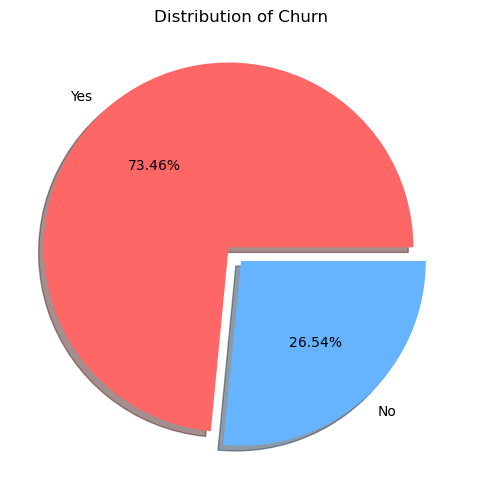

In [12]:
plt.figure(figsize=(12,6))
explode = [0.1, 0]
colors = ['#ff6666','#66b3ff']
plt.pie(df['Churn Label'].value_counts(), labels=df['Churn Label'].unique(), colors=colors,autopct='%.2f%%',shadow=True,explode=explode)
plt.title('Distribution of Churn')
plt.show()

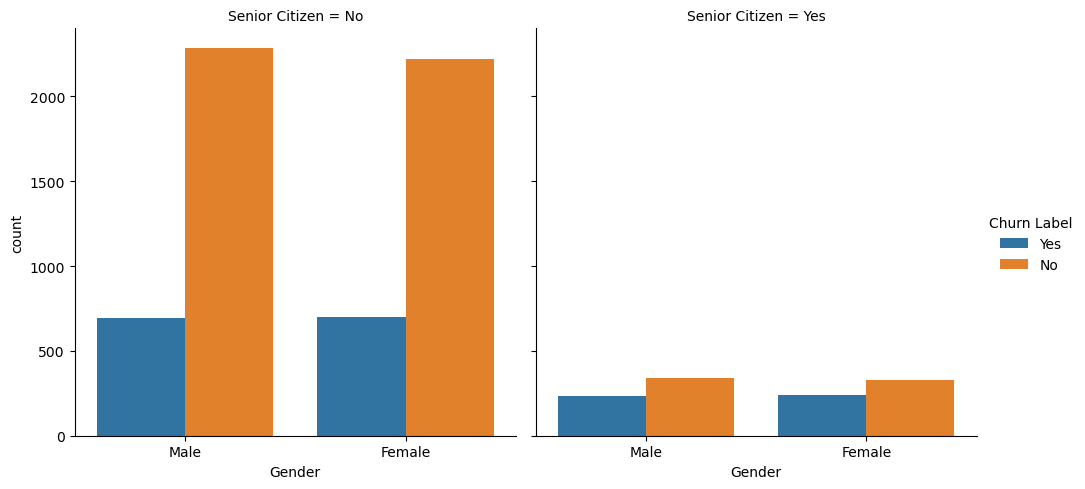

In [13]:
sns.catplot(x='Gender', hue='Churn Label', col='Senior Citizen', kind='count', data=df)

### For non-senior customers, the proportion of churned customers is roughly similar between males and females. However, for senior customers, the proportion of churned customers is much higher for males compared to females.

C:\Users\Prerna Bhatnagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prerna Bhatnagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


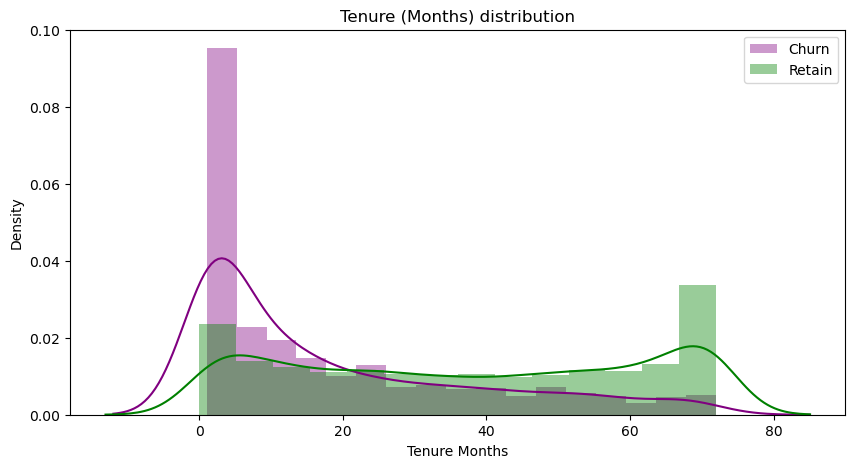

In [16]:
plt.figure(figsize=(10,5))
plt.title('Tenure (Months) distribution')
sns.distplot(df[df['Churn Label'] == 'Yes']['Tenure Months'], label='Churn',color='purple')
sns.distplot(df[df['Churn Label'] == 'No']['Tenure Months'], label='Retain',color='green')
plt.legend(loc= 'upper right')
plt.show()

### The longer a person uses the provider, the probability of churn decreases.

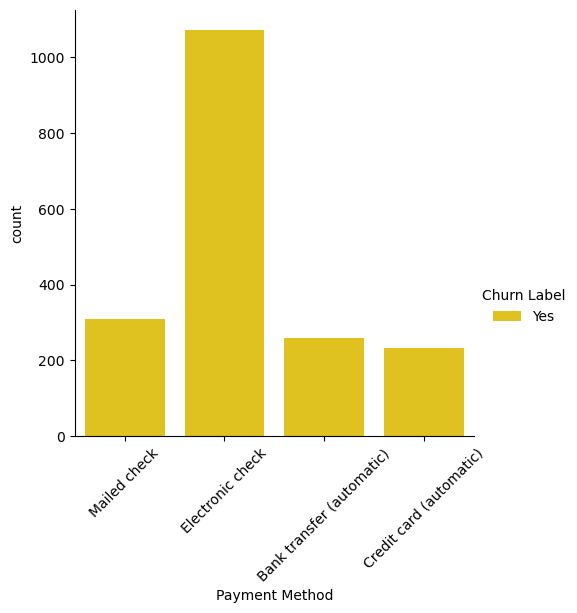

In [66]:
sns.catplot(x='Payment Method', hue='Churn Label', kind='count', data=df,palette={'No': 'teal', 'Yes': 'gold'})
plt.xticks(rotation=45)
plt.show()

### The most popular payment method is Electronic check, but it has a much higher proportion of churned customers compared to other payment methods.

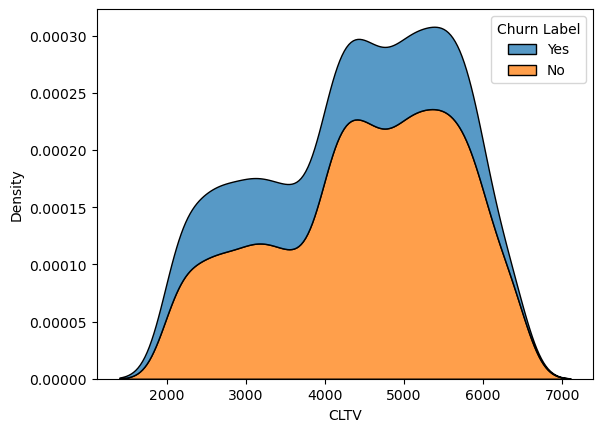

In [39]:
sns.kdeplot(data=df, x='CLTV', hue='Churn Label', multiple='stack')
plt.show()

### Customers with higher distribution of customer lifetime value (CLTV) (above 5000) are much less likely to churn, regardless of their exact CLTV value.

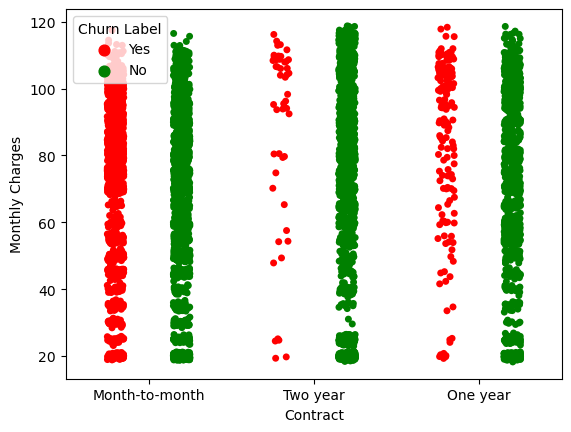

In [42]:
sns.stripplot(x='Contract', y='Monthly Charges', hue='Churn Label', data=df, jitter=True, dodge=True,palette=['red', 'green'])
plt.show()

### Customers on month-to-month contracts tend to have higher monthly charges compared to customers on longer-term contracts (one year and two years).There is a higher proportion of customers who have churned among those on month-to-month contracts.

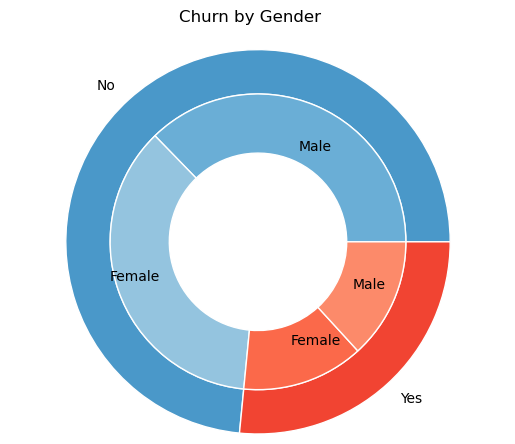

In [20]:
by_gender = df.groupby('Churn Label')['Gender'].value_counts().to_frame().rename(columns={'Gender': 'Freq'}).reset_index().sort_values('Churn Label')

# Make data: I have 3 groups and 7 subgroups
group_names=df['Churn Label'].value_counts().index
group_size=df['Churn Label'].value_counts()
subgroup_names=by_gender['Gender']
subgroup_size=by_gender['Freq']
 
# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Churn by Gender')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
plt.show()

### Among customers who have churned, there is a slightly higher proportion of females than males, as indicated by the larger red section of the inner ring.

C:\Users\Prerna Bhatnagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Prerna Bhatnagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


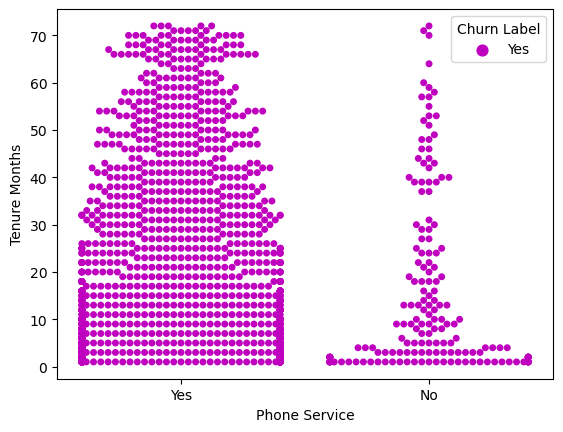

In [62]:
sns.swarmplot(x='Phone Service', y='Tenure Months', hue='Churn Label', data=df,palette=['m','y'])
plt.show()

### For customers with phone service, there is a wide range of tenure months, ranging from less than 1 month to over 70 months.There is a slight trend towards longer tenure for customers who have not churned 

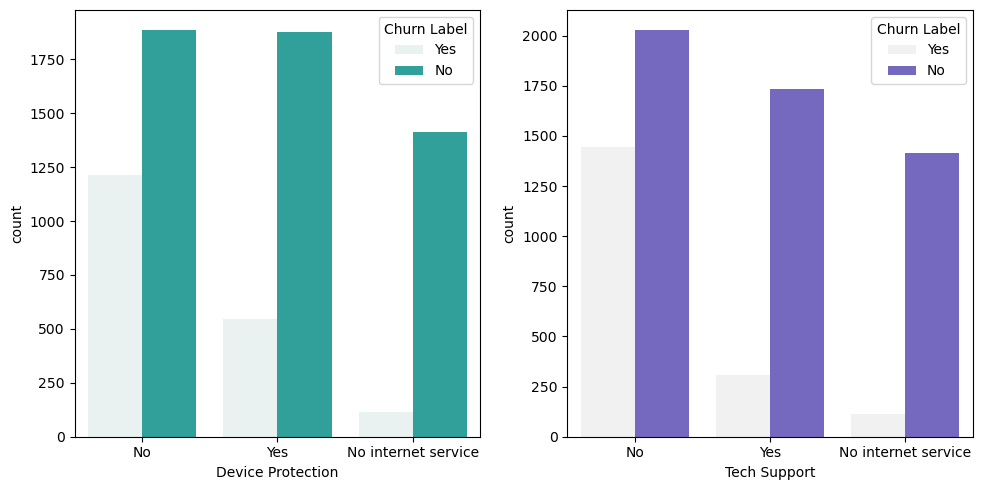

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x='Device Protection', hue='Churn Label', data=df,color='lightseagreen')
plt.subplot(1,2,2)
sns.countplot(x='Tech Support', hue='Churn Label', data=df,color='slateblue')
plt.tight_layout()
plt.show()

### In both plots, there are more customers who have not availed the service (indicated by the "No" category) than customers who have availed the service (indicated by the "Yes" category)

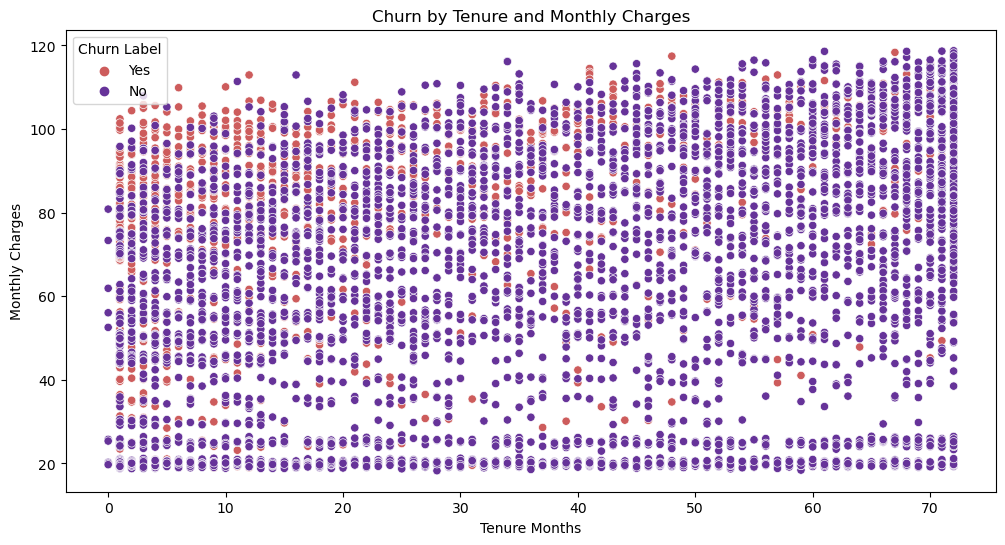

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Tenure Months', y='Monthly Charges', data=df, hue='Churn Label', palette={'No': 'rebeccapurple', 'Yes': 'indianred'})
plt.title('Churn by Tenure and Monthly Charges')
plt.show()

### Customers who have churned are generally clustered in the top right corner of the plot, indicating that they tend to have higher monthly charges and shorter tenure with the company.
### There are also some customers who have churned despite having low monthly charges and long tenure, as indicated by the red points in the bottom left corner of the plot.

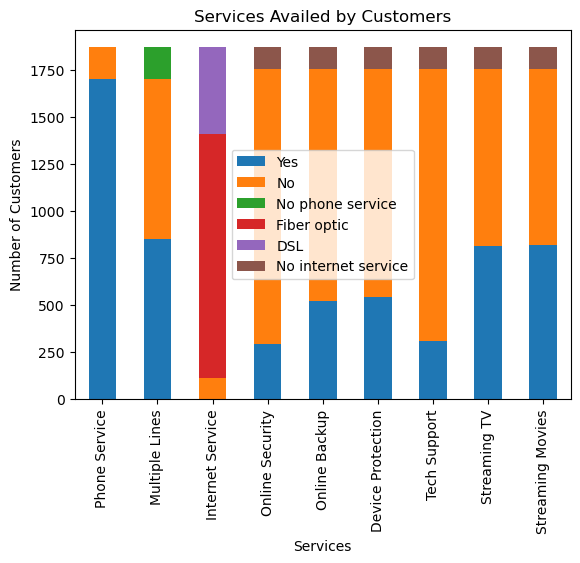

In [59]:
services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
service_counts = []
for service in services:
    service_counts.append(df[service].value_counts())
    
df_services = pd.concat(service_counts, axis=1)
df_services.columns = services

df_services = df_services.transpose()
df_services.plot(kind='bar', stacked=True)
plt.title('Services Availed by Customers')
plt.xlabel('Services')
plt.ylabel('Number of Customers')
plt.show()

### The most common services are Internet and Phone service. Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", and "Streaming Movies" are all add-on services that are availed by fewer customers.

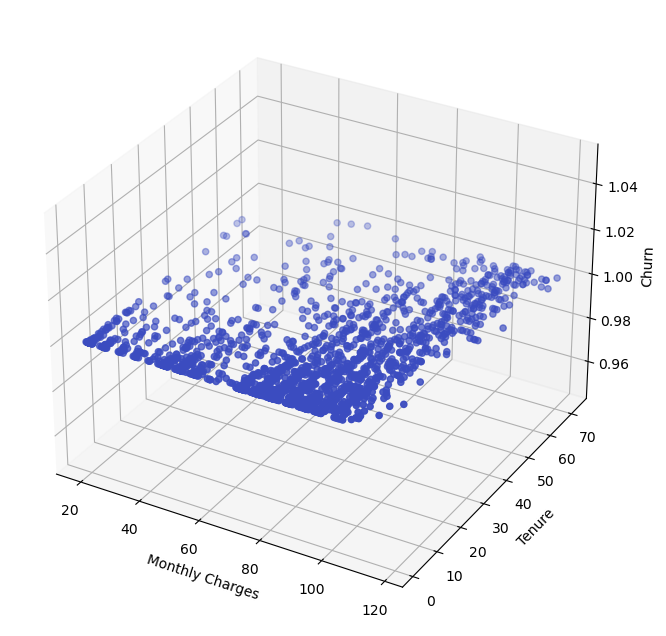

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Monthly Charges']
y = df['Tenure Months']
z = df['Churn Label'].replace({'Yes': 1, 'No': 0})

ax.scatter(x, y, z, c=z, cmap='coolwarm')

ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Tenure')
ax.set_zlabel('Churn')

plt.show()

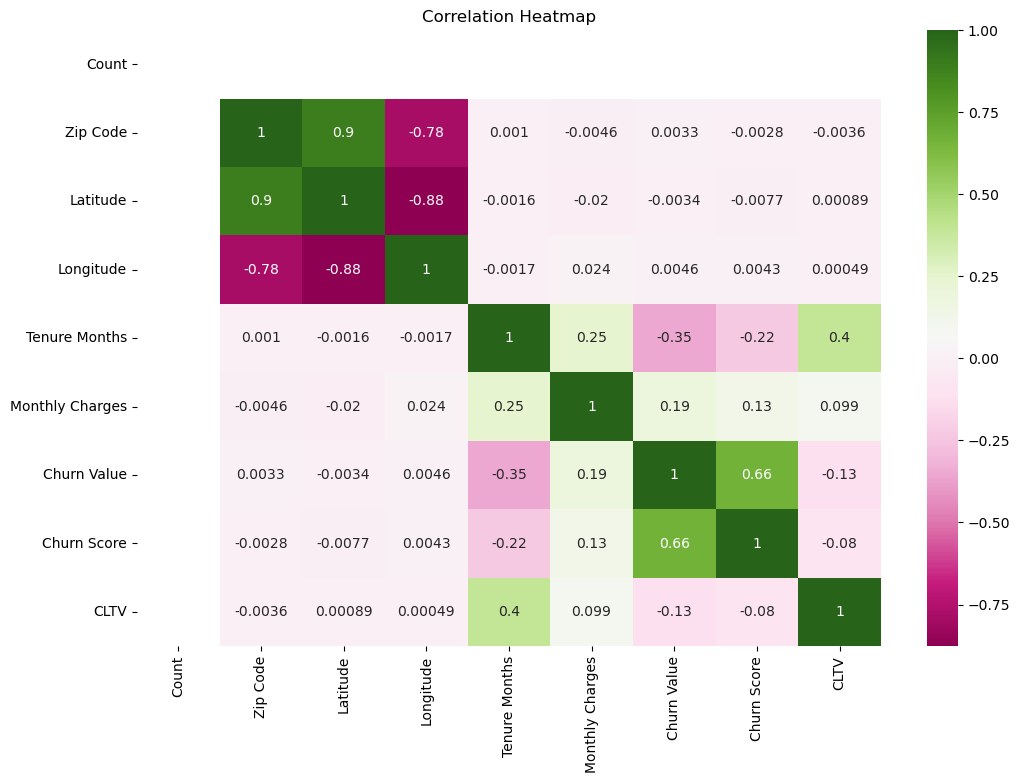

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

### There is strongest positive correlation with "Churn" is "tenure", so customers who have been with the company for a longer time are less likely to churn.
### There is a weak positive correlation between "Churn" and "PaperlessBilling", so customers who have opted for paperless billing are slightly more likely to churn.
### There is a moderate negative correlation between "Churn" and "Contract", with a correlation so customers who have a longer-term contract (i.e. those who have opted for "Two year" contracts) are less likely to churn.
### There is a strong positive correlation between "TotalCharges" and "MonthlyCharges", so customers who pay higher monthly charges have higher total charges over their tenure with the company.
### There is a moderate negative correlation between "tenure" and "Contract", so customers who opt for longer-term contracts have a longer tenure with the company.


![](https://media.tenor.com/0XhsMyIMTDgAAAAM/home-alone-macaulay-culkin.gif)